In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (100,100)

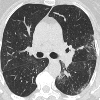

(100, 100, 3)


In [3]:
from google.colab.patches import cv2_imshow
a=cv2.imread("/content/drive/MyDrive/New_Data_CoV2/Covid/Patient/10.png")
a=cv2.resize(a,IMAGE_SIZE)
cv2_imshow(a)
print(a.shape)

In [4]:
path="/content/drive/MyDrive/New_Data_CoV2"

In [5]:
data=[]
c=0

for folder in os.listdir(path):
    sub_path=path+"/"+folder
    for folder2 in os.listdir(sub_path):
      sub_path2=sub_path+"/"+folder2
      for img in os.listdir(sub_path2):
        image_path=sub_path2+"/"+img        
        img_arr=cv2.imread(image_path)
        try:
          img_arr=cv2.resize(img_arr,IMAGE_SIZE)
          data.append(img_arr)
        except:
          c+=1
          continue
        

print("Number of images skipped= ",c)

Number of images skipped=  2


In [7]:
x=np.array(data)

In [8]:
x.shape

(4181, 100, 100, 3)

In [9]:
x=x/255.0

In [10]:
datagen = ImageDataGenerator(rescale = 1./255)
dataset = datagen.flow_from_directory(path,
                                      target_size = IMAGE_SIZE,
                                      batch_size = 32,
                                      class_mode = 'sparse')

Found 4181 images belonging to 3 classes.


In [11]:
dataset.class_indices

{'Covid': 0, 'Healthy': 1, 'Others': 2}

In [12]:
y=dataset.classes

In [13]:
y.shape

(4181,)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [15]:
x_train.shape,y_train.shape

((3009, 100, 100, 3), (3009,))

In [16]:
x_val.shape,y_val.shape

((753, 100, 100, 3), (753,))

In [17]:
x_test.shape,y_test.shape

((419, 100, 100, 3), (419,))

In [18]:
model=Sequential()

#covolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


#covolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#i/p layer
model.add(Flatten())


#o/p layer
model.add(Dense(3,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                        

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


In [21]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,callbacks=[early_stop],shuffle=True)

Epoch 1/30
95/95 [==============================] - 44s 440ms/step - loss: 0.9490 - accuracy: 0.5992 - val_loss: 1.2887 - val_accuracy: 0.1952
Epoch 2/30
95/95 [==============================] - 42s 439ms/step - loss: 0.6623 - accuracy: 0.7228 - val_loss: 1.0943 - val_accuracy: 0.3174
Epoch 3/30
95/95 [==============================] - 42s 446ms/step - loss: 0.5685 - accuracy: 0.7790 - val_loss: 1.0009 - val_accuracy: 0.5405
Epoch 4/30
95/95 [==============================] - 41s 434ms/step - loss: 0.6132 - accuracy: 0.7504 - val_loss: 1.0550 - val_accuracy: 0.4502
Epoch 5/30
95/95 [==============================] - 41s 431ms/step - loss: 0.4463 - accuracy: 0.8365 - val_loss: 0.8007 - val_accuracy: 0.6348
Epoch 6/30
95/95 [==============================] - 41s 430ms/step - loss: 0.5232 - accuracy: 0.7900 - val_loss: 0.6673 - val_accuracy: 0.7278
Epoch 7/30
95/95 [==============================] - 41s 432ms/step - loss: 0.3495 - accuracy: 0.8674 - val_loss: 0.8886 - val_accuracy: 0.6282

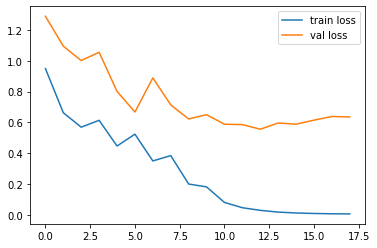

In [22]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()

plt.savefig('loss-graph.png')
plt.show()

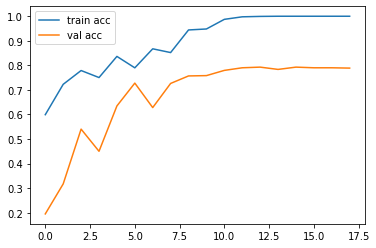

In [23]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('acc-graph.png')
plt.show()

In [24]:
y_val_pred=model.predict(x_val)
y_val_pred=np.argmax(y_val_pred,axis=1)
print(classification_report(y_val_pred,y_val))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       405
           1       0.54      0.62      0.58       116
           2       0.75      0.74      0.74       232

    accuracy                           0.79       753
   macro avg       0.73      0.74      0.73       753
weighted avg       0.80      0.79      0.79       753



In [25]:
confusion_matrix(y_val_pred,y_val)

array([[351,  23,  31],
       [ 18,  72,  26],
       [ 22,  39, 171]])

In [26]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [27]:
accuracy_score(y_pred,y_test)

0.7899761336515513

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       219
           1       0.51      0.72      0.60        60
           2       0.79      0.73      0.76       140

    accuracy                           0.79       419
   macro avg       0.74      0.76      0.74       419
weighted avg       0.81      0.79      0.80       419



In [29]:
confusion_matrix(y_pred,y_test)

array([[186,  18,  15],
       [  5,  43,  12],
       [ 15,  23, 102]])

In [31]:
model.save('/content/drive/MyDrive/covid19model.h5')